In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/DeepImage
!ls

/content/drive/MyDrive/DeepImage
best_ImageClassifierV1_.pt  dataset  dataset.zip  train.ipynb


In [5]:
!pip install torch torchvision matplotlib pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!unzip -q ./dataset.zip 

## Image To Tensor

In [6]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [7]:
train_transformer = transforms.Compose([ 
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transformer  = transforms.Compose([ 
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [8]:
train_images = datasets.ImageFolder(root='./dataset/train/', transform=train_transformer)
val_images = datasets.ImageFolder(root='./dataset/val/', transform=test_transformer)
test_images = datasets.ImageFolder(root='./dataset/test/', transform=test_transformer)
len(train_images), len(val_images), len(test_images)

(407, 63, 12)

In [9]:
train_dataloader = DataLoader(train_images, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_images, batch_size=16, shuffle=False)
test_dataloader = DataLoader(test_images, batch_size=16, shuffle=False)
len(train_dataloader), len(val_dataloader), len(test_dataloader)

(26, 4, 1)

In [10]:
407/16

25.4375

In [11]:
images, labels = next(iter(train_dataloader))
images.shape, labels.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

In [12]:
labels

tensor([0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0])

In [13]:
class_names = train_images.classes
class_names

['husky', 'mumbai cat', 'shiba inu']

In [14]:
images[0].shape, images[0].permute(1,2,0).shape

(torch.Size([3, 224, 224]), torch.Size([224, 224, 3]))

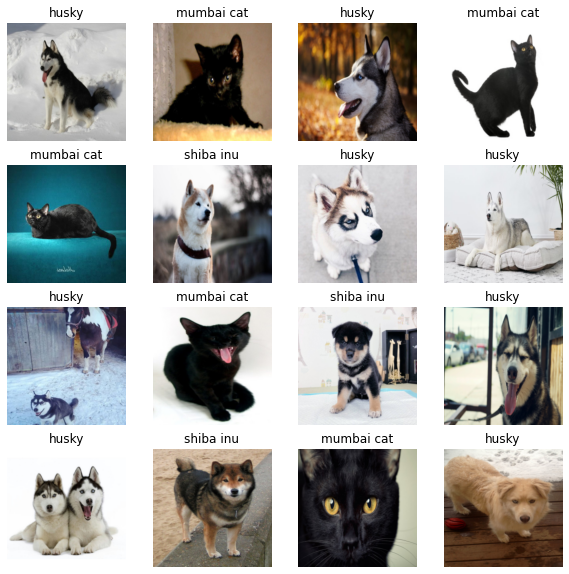

In [15]:
import matplotlib.pyplot as plt

i = 1
plt.figure(figsize=(10,10))
for image, label in zip(images, labels) :
  image = image.permute(1,2,0)
  class_ = class_names[label]
  plt.subplot(4, 4, i)
  plt.imshow(image)
  plt.title(class_)
  plt.axis('off')
  i += 1

## Build Model

In [16]:
from torch import nn

class DeepImage(nn.Module) :
    def __init__(self, n_classes=3) :
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3,3))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=12, kernel_size=(3,3))
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.3)
        self.output = nn.Linear(in_features=1, out_features=n_classes)

    def forward(self, x) :
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.output(x)
        return x

In [17]:
import torch 
try :
    images = torch.randn(size=(16, 3, 224, 224))
    models = DeepImage(n_classes=3)
    predict = models(images)
except Exception as e :
    print(e)

mat1 and mat2 shapes cannot be multiplied (16x34992 and 1x3)


In [18]:
class DeepImage(nn.Module) :
    def __init__(self, n_classes=3) :
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3,3))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=12, kernel_size=(3,3))
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.3)
        self.output = nn.Linear(in_features=34992, out_features=n_classes)

    def forward(self, x) :
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.output(x)
        return x

In [19]:
images = torch.randn(size=(16, 3, 224, 224))
models = DeepImage(n_classes=3)
predict = models(images)
predict

tensor([[ 7.3880e-01,  7.5575e-01,  3.7586e-02],
        [ 4.7599e-01,  4.5425e-01,  4.3232e-01],
        [ 7.9462e-01,  5.0435e-01, -9.7736e-01],
        [ 6.3924e-01,  2.3378e-02,  3.0286e-02],
        [ 2.7898e-01,  5.8379e-01, -2.4092e-01],
        [ 1.1098e+00, -7.5899e-01,  3.0250e-01],
        [ 9.1226e-01,  9.0511e-01, -3.0175e-01],
        [ 5.0775e-01,  1.7906e-02, -2.0063e-01],
        [ 6.9216e-02,  6.4724e-01, -6.7482e-01],
        [ 4.1179e-01,  2.6179e-01,  5.7852e-01],
        [ 1.6345e-01, -8.7677e-04, -1.2456e-01],
        [ 8.5031e-01,  1.3954e-01,  1.3027e-02],
        [-1.8679e-01, -2.4721e-02,  3.1919e-01],
        [ 3.1780e-01,  7.3972e-03,  4.6588e-01],
        [ 7.7050e-01, -1.4861e-01,  1.5188e-01],
        [-3.8776e-01,  4.6408e-01,  2.9059e-01]], grad_fn=<AddmmBackward0>)

In [20]:
torch.softmax(predict, dim=1)

tensor([[0.3979, 0.4047, 0.1974],
        [0.3406, 0.3333, 0.3261],
        [0.5214, 0.3900, 0.0886],
        [0.4798, 0.2592, 0.2610],
        [0.3389, 0.4596, 0.2015],
        [0.6249, 0.0964, 0.2787],
        [0.4367, 0.4336, 0.1297],
        [0.4750, 0.2911, 0.2339],
        [0.3070, 0.5472, 0.1459],
        [0.3287, 0.2829, 0.3884],
        [0.3849, 0.3266, 0.2886],
        [0.5197, 0.2553, 0.2250],
        [0.2608, 0.3067, 0.4325],
        [0.3457, 0.2534, 0.4009],
        [0.5161, 0.2059, 0.2780],
        [0.1882, 0.4410, 0.3708]], grad_fn=<SoftmaxBackward0>)

In [21]:
torch.argmax(predict, dim=1)

tensor([1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1])

## Train Model

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
device

'cpu'

In [23]:
def train_one_epoch(model, dataloader, loss_fn, optimizer) :
    model.train()
    train_acc, train_loss = 0, 0
    for batch, (images, labels) in enumerate(dataloader, start=1) :
         images, labels = images.to(device), labels.to(device)
         predict = model(images)
         loss = loss_fn(predict, labels)
         train_loss += loss.item()

         optimizer.zero_grad()
         loss.backward()
         optimizer.step()

         predict_labels = torch.argmax(predict, dim=1)
         train_acc += (predict_labels == labels).sum().item() / len(predict_labels)

         if batch%5 == 0 or (batch == len(dataloader)) :
             print(f'{batch}/{len(dataloader)} batches')
    
    train_acc = train_acc / len(dataloader)
    train_loss = train_loss / len(dataloader) 

    return train_acc, train_loss

In [24]:
def test_one_epoch(model, dataloader, loss_fn) :
    model.eval()
    test_acc, test_loss = 0, 0
    with torch.inference_mode() :
        for batch, (images, labels) in enumerate(dataloader, start=1) :
            images, labels = images.to(device), labels.to(device)
            predict = model(images)
            loss = loss_fn(predict, labels)
            test_loss += loss.item()

            predict_labels = torch.argmax(predict, dim=1)
            test_acc += (predict_labels == labels).sum().item() / len(predict_labels)

    test_acc = test_acc / len(dataloader)
    test_loss = test_loss / len(dataloader)

    return test_acc, test_loss

In [25]:
def train(
    model, train_dataloader, val_dataloader, loss_fn, optimizer, epochs, scheduler, model_name
) :
    result = {
        'train_acc' : [],
        'train_loss' : [],
        'val_acc' : [],
        'val_loss' : [],
    }

    best_loss = 10e+4
    print(f'\n\tstart training {model_name}')
    for epoch in range(1, epochs+1) :
        train_acc, train_loss = train_one_epoch(model, train_dataloader, loss_fn, optimizer)
        val_acc, val_loss = test_one_epoch(model, val_dataloader, loss_fn)
        scheduler.step(val_loss)
    
        if val_loss < best_loss :
            best_loss = val_loss 
            save_path = f'./best_{model_name}_.pt'
            torch.save(model.state_dict(), save_path)
            print(f'\n\tsave {model_name} with loss = {val_loss:.6f}')
            
            best_epoch = f'best epoch {epoch} val_acc {val_acc*100:.2f}%  val_loss {val_loss:.4f}'
        
        print(f'''
        \nepoch {epoch}/{epochs}
        \ttrain_acc {train_acc*100:.2f}% | val_acc {val_acc*100:.2f}%
        \ttrain_loss {train_loss:.4f} | val_loss {val_loss:.4f}
        ''')

        result['train_acc'].append(train_acc)
        result['train_loss'].append(train_loss)
        result['val_acc'].append(val_acc)
        result['val_loss'].append(val_loss)
    
    print(f'\n{best_epoch}')

    return result

In [26]:
model_name = 'ImageClassifierV1'
modelv1 = DeepImage(n_classes=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelv1.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.9, verbose=True)
modelv1

DeepImage(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 12, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.3, inplace=False)
  (output): Linear(in_features=34992, out_features=3, bias=True)
)

In [27]:
modelv1_result = train(
    modelv1, train_dataloader, val_dataloader, loss_fn, optimizer, 20, scheduler, model_name
)


	start training ImageClassifierV1
5/26 batches
10/26 batches
15/26 batches
20/26 batches
25/26 batches
26/26 batches

	save ImageClassifierV1 with loss = 0.956593

        
epoch 1/20
        	train_acc 37.98% | val_acc 61.77%
        	train_loss 1.2979 | val_loss 0.9566
        
5/26 batches
10/26 batches
15/26 batches
20/26 batches
25/26 batches
26/26 batches

	save ImageClassifierV1 with loss = 0.764253

        
epoch 2/20
        	train_acc 66.21% | val_acc 53.65%
        	train_loss 0.7683 | val_loss 0.7643
        
5/26 batches
10/26 batches
15/26 batches
20/26 batches
25/26 batches
26/26 batches

	save ImageClassifierV1 with loss = 0.695393

        
epoch 3/20
        	train_acc 73.66% | val_acc 60.52%
        	train_loss 0.5906 | val_loss 0.6954
        
5/26 batches
10/26 batches
15/26 batches
20/26 batches
25/26 batches
26/26 batches

	save ImageClassifierV1 with loss = 0.652759

        
epoch 4/20
        	train_acc 77.58% | val_acc 65.00%
        	train_loss 0.4915 | va

In [49]:
pretrain_model = DeepImage(n_classes=3).to(device)
pretrain_model.load_state_dict(torch.load(f=f'./best_{model_name}_.pt', map_location=device))

<All keys matched successfully>

In [55]:
acc, loss = test_one_epoch(pretrain_model, val_dataloader, loss_fn)
print(f'val result = {acc*100:.2f}% | {loss:.4f}')

val result = 72.71% | 0.5264


In [56]:
acc, loss = test_one_epoch(pretrain_model, test_dataloader, loss_fn)
print(f'test result = {acc*100:.2f}% | {loss:.4f}')

test result = 91.67% | 0.3889


In [28]:
import pandas as pd
from google.colab import files

model_result = pd.DataFrame(modelv1_result)
model_result.head()

,train_acc,train_loss,val_acc,val_loss
0,0.379808,1.297871,0.617708,0.956593
1,0.662088,0.768341,0.536458,0.764253
2,0.736607,0.590588,0.605208,0.695393
3,0.775755,0.491471,0.650000,0.652759
4,0.817308,0.438693,0.669792,0.711893


In [30]:
model_result.to_csv(f'{model_name}_result.csv')

In [31]:
files.download(f'{model_name}_result.csv')
files.download(f'./best_{model_name}_.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
epochs = [x for x in range(1, len(model_result)+1 ) ]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [68]:
import numpy as np 
best_val_acc = np.max(model_result['val_acc'].to_numpy())*100
best_val_loss = np.min(model_result['val_loss'].to_numpy())
best_val_acc, best_val_loss

(78.02083333333334, 0.5263895839452744)

In [ ]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.plot(epochs, model_result['train_acc']*100, label='train')
plt.plot(epochs, model_result['val_acc']*100, label='val')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_result['train_loss'], label='train')
plt.plot(epochs, model_result['val_loss'], label='val')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

suptitle = f'{model_name} result\nacc = {best_val_acc:.2f}% | loss = {best_val_loss:.3f}'
plt.suptitle(suptitle, fontsize=15)
plt.savefig(f'{model_name}_result.jpg')

In [57]:
files.download('train.ipynb')
files.download(f'{model_name}_result.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>